In [480]:
import glob
import os
import pandas as pd
import numpy as np

%load_ext lab_black

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


# Write short sym links for every sample + cell type DAR set combination

In [481]:
samples = sorted(
    list(
        set(
            [
                x.split("/")[-1].split(".")[0]
                for x in sorted(
                    glob.glob(
                        "../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/*/*"
                    )
                )
            ]
        )
    )
)
samples

['BIO_ddseq_1',
 'BIO_ddseq_2',
 'BIO_ddseq_3',
 'BIO_ddseq_4',
 'BRO_mtscatac_1',
 'BRO_mtscatac_2',
 'CNA_10xmultiome_1',
 'CNA_10xmultiome_2',
 'CNA_10xv11_1',
 'CNA_10xv11_2',
 'CNA_10xv11_3',
 'CNA_10xv11_4',
 'CNA_10xv11_5',
 'CNA_10xv2_1',
 'CNA_10xv2_2',
 'CNA_hydrop_1',
 'CNA_hydrop_2',
 'CNA_hydrop_3',
 'CNA_mtscatac_1',
 'CNA_mtscatac_2',
 'EPF_hydrop_1',
 'EPF_hydrop_2',
 'EPF_hydrop_3',
 'EPF_hydrop_4',
 'HAR_ddseq_1',
 'HAR_ddseq_2',
 'MDC_mtscatac_1',
 'MDC_mtscatac_2',
 'OHS_s3atac_1',
 'OHS_s3atac_2',
 'SAN_10xmultiome_1',
 'SAN_10xmultiome_2',
 'STA_10xv11_1',
 'STA_10xv11_2',
 'TXG_10xv11_1',
 'TXG_10xv2_1',
 'TXG_10xv2_2',
 'UCS_ddseq_1',
 'UCS_ddseq_2',
 'VIB_10xmultiome_1',
 'VIB_10xmultiome_2',
 'VIB_10xv1_1',
 'VIB_10xv1_2',
 'VIB_10xv2_1',
 'VIB_10xv2_2',
 'VIB_hydrop_1',
 'VIB_hydrop_2']

In [482]:
samples_number_dict = {x: samples.index(x) for x in samples}
samples_number_dict

{'BIO_ddseq_1': 0,
 'BIO_ddseq_2': 1,
 'BIO_ddseq_3': 2,
 'BIO_ddseq_4': 3,
 'BRO_mtscatac_1': 4,
 'BRO_mtscatac_2': 5,
 'CNA_10xmultiome_1': 6,
 'CNA_10xmultiome_2': 7,
 'CNA_10xv11_1': 8,
 'CNA_10xv11_2': 9,
 'CNA_10xv11_3': 10,
 'CNA_10xv11_4': 11,
 'CNA_10xv11_5': 12,
 'CNA_10xv2_1': 13,
 'CNA_10xv2_2': 14,
 'CNA_hydrop_1': 15,
 'CNA_hydrop_2': 16,
 'CNA_hydrop_3': 17,
 'CNA_mtscatac_1': 18,
 'CNA_mtscatac_2': 19,
 'EPF_hydrop_1': 20,
 'EPF_hydrop_2': 21,
 'EPF_hydrop_3': 22,
 'EPF_hydrop_4': 23,
 'HAR_ddseq_1': 24,
 'HAR_ddseq_2': 25,
 'MDC_mtscatac_1': 26,
 'MDC_mtscatac_2': 27,
 'OHS_s3atac_1': 28,
 'OHS_s3atac_2': 29,
 'SAN_10xmultiome_1': 30,
 'SAN_10xmultiome_2': 31,
 'STA_10xv11_1': 32,
 'STA_10xv11_2': 33,
 'TXG_10xv11_1': 34,
 'TXG_10xv2_1': 35,
 'TXG_10xv2_2': 36,
 'UCS_ddseq_1': 37,
 'UCS_ddseq_2': 38,
 'VIB_10xmultiome_1': 39,
 'VIB_10xmultiome_2': 40,
 'VIB_10xv1_1': 41,
 'VIB_10xv1_2': 42,
 'VIB_10xv2_1': 43,
 'VIB_10xv2_2': 44,
 'VIB_hydrop_1': 45,
 'VIB_hydrop_2': 4

In [483]:
cell_types_numbers_dict = {
    "Dendritic_cell": "a",
    "Cytotoxic_T_cell": "b",
    "Natural_killer_cell": "c",
    "DARs_dict.pkl": "d",
    "CD14+_monocyte": "e",
    "CD16+_monocyte": "f",
    "B_cell": "g",
    "CD4+_T_cell": "h",
}

In [484]:
cell_types = list(
    set(
        [
            x.split("/")[-1].split("__")[1]
            for x in sorted(glob.glob("downstream_analysis/DARs/*/*"))
        ]
    )
)

cell_type_path = f"upset_mergepeaks_individual_samples/"
if not os.path.exists(cell_type_path):
    os.mkdir(cell_type_path)

cell_type_path = f"upset_mergepeaks_individual_samples/DARs/"
if not os.path.exists(cell_type_path):
    os.mkdir(cell_type_path)

## make sure that every DAR has a unique name


In [485]:
for file_path in sorted(
    glob.glob(
        "../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/*/*__DARs.bed"
    )
):
    print(file_path)
    if not os.path.exists(file_path.replace(".bed", ".unique.bed")):
        df = pd.read_csv(file_path, sep="\t", header=None)
        df[3] = df[3] + "_" + [str(x) for x in pd.DataFrame(range(len(df)))[0]]
        df.to_csv(
            file_path.replace(".bed", ".unique.bed"), header=None, index=False, sep="\t"
        )

../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BIO_ddseq_1.FIXEDCELLS/BIO_ddseq_1.FIXEDCELLS__B_cell__DARs.bed
../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BIO_ddseq_1.FIXEDCELLS/BIO_ddseq_1.FIXEDCELLS__CD14+_monocyte__DARs.bed
../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BIO_ddseq_1.FIXEDCELLS/BIO_ddseq_1.FIXEDCELLS__CD4+_T_cell__DARs.bed
../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BIO_ddseq_1.FIXEDCELLS/BIO_ddseq_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.bed
../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BIO_ddseq_1.FIXEDCELLS/BIO_ddseq_1.FIXEDCELLS__Dendritic_cell__DARs.bed
../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BIO_ddseq_1.FIXEDCELLS/BIO_ddseq_1.FIXEDCELLS__Natural_killer_cell__DARs.bed
../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BIO_ddseq_2.FIXEDCELLS/BIO_ddseq_2.FIXEDCELLS__B_cell__DARs.bed
../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BIO_ddseq_2.FIXEDCELLS/BIO_d

# make symlinks from these dars to here

In [486]:
for cell_type in cell_types:
    # print(cell_type)
    paths = sorted(
        glob.glob(
            f"../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/*/*{cell_type}__DARs.unique.bed"
        )
    )
    print(paths)
    for path in paths:
        sample = path.split("/")[-1].split(".")[0]

        symlink_path = f"{cell_type_path}{cell_types_numbers_dict[cell_type]}_{samples_number_dict[sample]}"

        if not os.path.exists(symlink_path):
            print(symlink_path)
            print("not")
            os.symlink(f"../../{path}", f"{symlink_path}")

['../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BIO_ddseq_1.FIXEDCELLS/BIO_ddseq_1.FIXEDCELLS__Dendritic_cell__DARs.unique.bed', '../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BIO_ddseq_2.FIXEDCELLS/BIO_ddseq_2.FIXEDCELLS__Dendritic_cell__DARs.unique.bed', '../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BIO_ddseq_3.FIXEDCELLS/BIO_ddseq_3.FIXEDCELLS__Dendritic_cell__DARs.unique.bed', '../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BIO_ddseq_4.FIXEDCELLS/BIO_ddseq_4.FIXEDCELLS__Dendritic_cell__DARs.unique.bed', '../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BRO_mtscatac_1.FIXEDCELLS/BRO_mtscatac_1.FIXEDCELLS__Dendritic_cell__DARs.unique.bed', '../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/BRO_mtscatac_2.FIXEDCELLS/BRO_mtscatac_2.FIXEDCELLS__Dendritic_cell__DARs.unique.bed', '../fixedcells_3_cistopic_consensus/downstream_analysis/DARs/CNA_10xmultiome_1.FIXEDCELLS/CNA_10xmultiome_1.FIXEDCELLS__Dendritic_cell_

# add sym links for the merged set DARs:

## make unique

In [487]:
for file_path in sorted(
    glob.glob(
        "../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/*__DARs.bed"
    )
):
    print(file_path)
    if not os.path.exists(file_path.replace(".bed", ".unique.bed")):
        df = pd.read_csv(file_path, sep="\t", header=None)
        df[3] = df[3] + "_" + [str(x) for x in pd.DataFrame(range(len(df)))[0]]
        df.to_csv(
            file_path.replace(".bed", ".unique.bed"), header=None, index=False, sep="\t"
        )

../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__B_cell__DARs.bed
../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD14+_monocyte__DARs.bed
../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD16+_monocyte__DARs.bed
../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD4+_T_cell__DARs.bed
../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.bed
../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__Dendritic_cell__DARs.bed
../fixedcells_7_merged_eq

## write dars top and bot 20 pct

In [488]:
merged_peak_path_dict = {
    x.split("/")[-1].split("__")[1]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/*unique.bed"
        )
    )
}

for sample, path in merged_peak_path_dict.items():
    print(sample)
    path_top = path.replace(".bed", "__top20pct.bed")
    path_bot = path.replace(".bed", "__bot20pct.bed")
    if not os.path.exists(path_top):
        df = pd.read_csv(path, sep="\t", header=None)

        df_top = df[df[4] > np.percentile(df[4], 80)]
        df_bot = df[df[4] < np.percentile(df[4], 20)]

        df_bot.to_csv(path_bot, sep="\t", index=False, header=None)
        df_top.to_csv(path_top, sep="\t", index=False, header=None)

B_cell
CD14+_monocyte
CD16+_monocyte
CD4+_T_cell
Cytotoxic_T_cell
Dendritic_cell
Natural_killer_cell


In [489]:
# for cell_type in cell_types:
#     # print(cell_type)
#     paths = sorted(
#         glob.glob(
#             f"../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/*{cell_type}__DARs.unique_*20pct.bed"
#         )
#     )
#     # print(paths)

#     for path in paths:
#         # sample = path.split("/")[-1].split(".")[0]
#         sample = (
#             path.split("__")[-1]
#             .replace("top20pct.bed", "t")
#             .replace("bot20pct.bed", "b")
#         )

#         symlink_path = f"{cell_type_path}{cell_types_numbers_dict[cell_type]}_{sample}"

#         if not os.path.exists(symlink_path):
#             print(symlink_path)
#             print("not")
#             os.symlink(f"../../{path}", f"{symlink_path}")

# now write the parallel file

In [490]:
cell_types_numbers_dict = {
    "Dendritic_cell": "a",
    "Cytotoxic_T_cell": "b",
    "Natural_killer_cell": "c",
    "DARs_dict.pkl": "d",
    "CD14+_monocyte": "e",
    "CD16+_monocyte": "f",
    "B_cell": "g",
    "CD4+_T_cell": "h",
}

In [491]:
cell_types_numbers_dict_rev = {y: x for x, y in cell_types_numbers_dict.items()}
cell_types_numbers_dict_rev

{'a': 'Dendritic_cell',
 'b': 'Cytotoxic_T_cell',
 'c': 'Natural_killer_cell',
 'd': 'DARs_dict.pkl',
 'e': 'CD14+_monocyte',
 'f': 'CD16+_monocyte',
 'g': 'B_cell',
 'h': 'CD4+_T_cell'}

In [492]:
merged_dar_path_dict = {
    x.split("/")[-1].split("__")[1]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/*DARs.unique.bed"
        )
    )
}
merged_dar_path_dict

{'B_cell': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__B_cell__DARs.unique.bed',
 'CD14+_monocyte': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD14+_monocyte__DARs.unique.bed',
 'CD16+_monocyte': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD16+_monocyte__DARs.unique.bed',
 'CD4+_T_cell': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD4+_T_cell__DARs.unique.bed',
 'Cytotoxic_T_cell': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.unique.bed',
 'Dendritic_cell': '../fixedcells_7_merged_equalcells

In [493]:
merged_dar_path_top_dict = {
    x.split("/")[-1].split("__")[1]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/*top20pct.bed"
        )
    )
}

merged_dar_path_bot_dict = {
    x.split("/")[-1].split("__")[1]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/*bot20pct.bed"
        )
    )
}

merged_dar_path_bot_dict

{'B_cell': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__B_cell__DARs.unique__bot20pct.bed',
 'CD14+_monocyte': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD14+_monocyte__DARs.unique__bot20pct.bed',
 'CD16+_monocyte': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD16+_monocyte__DARs.unique__bot20pct.bed',
 'CD4+_T_cell': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__CD4+_T_cell__DARs.unique__bot20pct.bed',
 'Cytotoxic_T_cell': '../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.unique__bot20pct.bed',
 'D

In [494]:
parallel_filename = "homer_mergepeaks_DARs.parallel"
cell_type_aliases = set(
    [
        x.split("/")[-1].split("_")[0]
        for x in sorted(glob.glob("upset_mergepeaks_individual_samples/DARs/*"))
    ]
)

with open(parallel_filename, "w") as f:
    for cell_type_alias in cell_type_aliases:
        # print(cell_type)
        dar_paths = sorted(
            glob.glob(f"upset_mergepeaks_individual_samples/DARs/{cell_type_alias}*")
        )
        # dar_paths = [x.split("/")[-1] for x in dar_paths]

        cell_type = cell_types_numbers_dict_rev[cell_type_alias]
        merged_dar_path_top = merged_dar_path_top_dict[cell_type]
        merged_dar_path_bot = merged_dar_path_bot_dict[cell_type]

        for dar_path in dar_paths:
            sample_number = dar_path.split("_")[-1]
            command = f"mergePeaks -d given {dar_path} {merged_dar_path_top} -prefix upset_mergepeaks_individual_samples/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars__ -venn upset_mergepeaks_individual_samples/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars_venn.txt -matrix upset_mergepeaks_individual_samples/{cell_type_alias}_{sample_number}__top20pct_dars_matrix.txt > upset_mergepeaks_individual_samples/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars_overlap.bed && rm upset_mergepeaks_individual_samples/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars_*"
            f.write(f"{command}\n")
            print(command)

            command = f"mergePeaks -d given {dar_path} {merged_dar_path_bot} -prefix upset_mergepeaks_individual_samples/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars__ -venn upset_mergepeaks_individual_samples/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars_venn.txt -matrix upset_mergepeaks_individual_samples/{cell_type_alias}_{sample_number}__bot20pct_dars_matrix.txt > upset_mergepeaks_individual_samples/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars_overlap.bed && rm upset_mergepeaks_individual_samples/FIXEDCELLS__{cell_type_alias}_{sample_number}__dars_*"
            f.write(f"{command}\n")
            print(command)

mergePeaks -d given upset_mergepeaks_individual_samples/DARs/g_0 ../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__B_cell__DARs.unique__top20pct.bed -prefix upset_mergepeaks_individual_samples/FIXEDCELLS__g_0__dars__ -venn upset_mergepeaks_individual_samples/FIXEDCELLS__g_0__dars_venn.txt -matrix upset_mergepeaks_individual_samples/g_0__top20pct_dars_matrix.txt > upset_mergepeaks_individual_samples/FIXEDCELLS__g_0__dars_overlap.bed && rm upset_mergepeaks_individual_samples/FIXEDCELLS__g_0__dars_*
mergePeaks -d given upset_mergepeaks_individual_samples/DARs/g_0 ../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/master_celltypefair_1.FIXEDCELLS/master_celltypefair_1.FIXEDCELLS__B_cell__DARs.unique__bot20pct.bed -prefix upset_mergepeaks_individual_samples/FIXEDCELLS__g_0__dars__ -venn upset_mergepeaks_individual_samples/FIXEDCELLS__g_0__dars_venn.txt -matrix upset_mergepeaks_indiv

```
module load HOMER/4.11-foss-2021a
my_conda_initialize
cat homer_mergepeaks_DARs.parallel | parallel -j 16 --progress
```

# Do the same, for peaks

In [495]:
cell_types_numbers_dict = {
    "CD16_monocyte": "i",
    "CD4_Tcell": "j",
    "CD14_monocyte": "k",
    "Naturalkillercell": "l",
    "Dendriticcell": "m",
    "CytotoxicTcell": "n",
    "Bcell": "o",
}

cell_types_numbers_dict_rev = {y: x for x, y in cell_types_numbers_dict.items()}
cell_types_numbers_dict

{'CD16_monocyte': 'i',
 'CD4_Tcell': 'j',
 'CD14_monocyte': 'k',
 'Naturalkillercell': 'l',
 'Dendriticcell': 'm',
 'CytotoxicTcell': 'n',
 'Bcell': 'o'}

In [496]:
samples_number_dict["master_celltypefairmerged_1"] = 99

In [497]:
# cell_types = list(
#     set(
#         [
#             x.split("/")[-1].split("_p")[0]
#             for x in sorted(glob.glob("final_consensus_peaks/*/*_peaks.narrowPeak"))
#         ]
#     )
# )

# for cell_type in cell_types:
#     paths = sorted(glob.glob(f"final_consensus_peaks/*/*{cell_type}*_peaks.narrowPeak"))
#     for path in paths:
#         sample = path.split("/")[-2].split(".")[0]
#         cell_type_path = f"upset_mergepeaks_individual_samples/peaks/"
#         if not os.path.exists(cell_type_path):
#             os.mkdir(cell_type_path)

#         symlink_path = f"{cell_type_path}/{cell_types_numbers_dict[cell_type]}_{samples_number_dict[sample]}"
#         if not os.path.exists(symlink_path):
#             os.symlink(f"../../{path}", f"{symlink_path}")

In [498]:
cell_types = sorted(
    set(
        [
            x.split("/")[-1].split(".")[0]
            for x in sorted(
                glob.glob(
                    f"../fixedcells_3_cistopic_consensus/final_consensus_peaks/*/*bw"
                )
            )
        ]
    )
)

In [499]:
for cell_type in cell_types:
    paths = sorted(
        glob.glob(
            f"../fixedcells_3_cistopic_consensus/final_consensus_peaks/*/*{cell_type}*_peaks.narrowPeak"
        )
    )
    for path in paths:
        sample = path.split("/")[-2].split(".")[0]
        cell_type_path = f"upset_mergepeaks_individual_samples/peaks/"
        if not os.path.exists(cell_type_path):
            os.mkdir(cell_type_path)

        symlink_path = f"{cell_type_path}/{cell_types_numbers_dict[cell_type]}_{samples_number_dict[sample]}"
        if not os.path.exists(symlink_path):
            os.symlink(f"../../{path}", f"{symlink_path}")

In [500]:
# for peak_path in sorted(
#     glob.glob(
#         "../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/*bed"
#     )
# ):
#     if not os.path.exists(peak_path.replace(".bed", ".top20pct.bed")):
#         print("test")
#         df = pd.read_csv(peak_path, sep="\t", header=None)

In [501]:
for peak_path in sorted(
    glob.glob(
        "../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/*summits.bed"
    )
):
    path_top = peak_path.replace(".bed", "__top20pct.bed")
    path_bot = peak_path.replace(".bed", "__bot20pct.bed")
    if not os.path.exists(path_top):
        print("printing")
        df = pd.read_csv(peak_path, sep="\t", header=None)

        df_top = df[df[4] > np.percentile(df[4], 80)]
        df_bot = df[df[4] < np.percentile(df[4], 20)]

        df_bot.to_csv(path_bot, sep="\t", index=False, header=None)
        df_top.to_csv(path_top, sep="\t", index=False, header=None)
    else:
        print("exists")

exists
exists
exists
exists
exists
exists
exists


module load HOMER/4.11-foss-2021a
my_conda_initialize
cat homer_mergepeaks_DARs.parallel | parallel -j 16 --progress

In [502]:
merged_peak_path_top_dict = {
    x.split("/")[-1].split("_summits")[0]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/*top20pct.bed"
        )
    )
}


merged_peak_path_bot_dict = {
    x.split("/")[-1].split("_summits")[0]: x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/*bot20pct.bed"
        )
    )
}

merged_peak_path_bot_dict

{'Bcell': '../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/Bcell_summits__bot20pct.bed',
 'CD14_monocyte': '../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CD14_monocyte_summits__bot20pct.bed',
 'CD16_monocyte': '../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CD16_monocyte_summits__bot20pct.bed',
 'CD4_Tcell': '../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CD4_Tcell_summits__bot20pct.bed',
 'CytotoxicTcell': '../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CytotoxicTcell_summits__bot20pct.bed',
 'Dendriticcell': '../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair

In [503]:
parallel_filename = "homer_mergepeaks_peaks.parallel"
cell_type_aliases = set(
    [
        x.split("/")[-1].split("_")[0]
        for x in sorted(glob.glob("upset_mergepeaks_individual_samples/peaks/*"))
    ]
)

with open(parallel_filename, "w") as f:
    for cell_type_alias in cell_type_aliases:
        # print(cell_type)
        peak_paths = sorted(
            glob.glob(f"upset_mergepeaks_individual_samples/peaks/{cell_type_alias}*")
        )
        # peak_paths = [x.split("/")[-1] for x in peak_paths]

        cell_type = cell_types_numbers_dict_rev[cell_type_alias]
        merged_peak_path_top = merged_peak_path_top_dict[cell_type]
        merged_peak_path_bot = merged_peak_path_bot_dict[cell_type]

        for peak_path in peak_paths:
            sample_number = peak_path.split("_")[-1]
            command = f"mergePeaks -d given {peak_path} {merged_peak_path_top} -prefix upset_mergepeaks_individual_samples/FIXEDCELLS__{cell_type_alias}_{sample_number}__peaks__ -venn upset_mergepeaks_individual_samples/FIXEDCELLS__{cell_type_alias}_{sample_number}__peaks_venn.txt -matrix upset_mergepeaks_individual_samples/{cell_type_alias}_{sample_number}__top20pct_peaks_matrix.txt > upset_mergepeaks_individual_samples/FIXEDCELLS__{cell_type_alias}_{sample_number}__peaks_overlap.bed && rm upset_mergepeaks_individual_samples/FIXEDCELLS__{cell_type_alias}_{sample_number}__peaks_*"
            f.write(f"{command}\n")
            print(command)

            command = f"mergePeaks -d given {peak_path} {merged_peak_path_bot} -prefix upset_mergepeaks_individual_samples/FIXEDCELLS__{cell_type_alias}_{sample_number}__peaks__ -venn upset_mergepeaks_individual_samples/FIXEDCELLS__{cell_type_alias}_{sample_number}__peaks_venn.txt -matrix upset_mergepeaks_individual_samples/{cell_type_alias}_{sample_number}__bot20pct_peaks_matrix.txt > upset_mergepeaks_individual_samples/FIXEDCELLS__{cell_type_alias}_{sample_number}__peaks_overlap.bed && rm upset_mergepeaks_individual_samples/FIXEDCELLS__{cell_type_alias}_{sample_number}__peaks_*"
            f.write(f"{command}\n")
            print(command)

mergePeaks -d given upset_mergepeaks_individual_samples/peaks/k_0 ../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CD14_monocyte_summits__top20pct.bed -prefix upset_mergepeaks_individual_samples/FIXEDCELLS__k_0__peaks__ -venn upset_mergepeaks_individual_samples/FIXEDCELLS__k_0__peaks_venn.txt -matrix upset_mergepeaks_individual_samples/k_0__top20pct_peaks_matrix.txt > upset_mergepeaks_individual_samples/FIXEDCELLS__k_0__peaks_overlap.bed && rm upset_mergepeaks_individual_samples/FIXEDCELLS__k_0__peaks_*
mergePeaks -d given upset_mergepeaks_individual_samples/peaks/k_0 ../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CD14_monocyte_summits__bot20pct.bed -prefix upset_mergepeaks_individual_samples/FIXEDCELLS__k_0__peaks__ -venn upset_mergepeaks_individual_samples/FIXEDCELLS__k_0__peaks_venn.txt -matrix upset_mergepeaks_individual_samples

In [504]:
samples_number_dict = {x: samples.index(x) for x in samples}
samples_number_dict

{'BIO_ddseq_1': 0,
 'BIO_ddseq_2': 1,
 'BIO_ddseq_3': 2,
 'BIO_ddseq_4': 3,
 'BRO_mtscatac_1': 4,
 'BRO_mtscatac_2': 5,
 'CNA_10xmultiome_1': 6,
 'CNA_10xmultiome_2': 7,
 'CNA_10xv11_1': 8,
 'CNA_10xv11_2': 9,
 'CNA_10xv11_3': 10,
 'CNA_10xv11_4': 11,
 'CNA_10xv11_5': 12,
 'CNA_10xv2_1': 13,
 'CNA_10xv2_2': 14,
 'CNA_hydrop_1': 15,
 'CNA_hydrop_2': 16,
 'CNA_hydrop_3': 17,
 'CNA_mtscatac_1': 18,
 'CNA_mtscatac_2': 19,
 'EPF_hydrop_1': 20,
 'EPF_hydrop_2': 21,
 'EPF_hydrop_3': 22,
 'EPF_hydrop_4': 23,
 'HAR_ddseq_1': 24,
 'HAR_ddseq_2': 25,
 'MDC_mtscatac_1': 26,
 'MDC_mtscatac_2': 27,
 'OHS_s3atac_1': 28,
 'OHS_s3atac_2': 29,
 'SAN_10xmultiome_1': 30,
 'SAN_10xmultiome_2': 31,
 'STA_10xv11_1': 32,
 'STA_10xv11_2': 33,
 'TXG_10xv11_1': 34,
 'TXG_10xv2_1': 35,
 'TXG_10xv2_2': 36,
 'UCS_ddseq_1': 37,
 'UCS_ddseq_2': 38,
 'VIB_10xmultiome_1': 39,
 'VIB_10xmultiome_2': 40,
 'VIB_10xv1_1': 41,
 'VIB_10xv1_2': 42,
 'VIB_10xv2_1': 43,
 'VIB_10xv2_2': 44,
 'VIB_hydrop_1': 45,
 'VIB_hydrop_2': 4

In [505]:
samples_number_dict_rev = {y: x for x, y in samples_number_dict.items()}

In [506]:
# parallel_filename = "homer_mergepeaks_peaks.parallel"
# sample_aliases = set(
#     [
#         x.split("/")[-1].split("_")[0]
#         for x in sorted(glob.glob("upset_mergepeaks_individual_samples/peaks/*"))
#     ]
# )
# peak_paths = sorted(glob.glob(f"upset_mergepeaks_individual_samples/peaks/*"))

# with open(parallel_filename, "w") as f:
#     for peak_path in peak_paths:
#         # print(cell_type)
#         # peak_paths = [x.split("/")[-1] for x in peak_paths]

#         sample_alias = peak_path.split("/")[-1]
#         sample = samples_number_dict_rev[int(sample_alias.split("_")[-1])]
#         merged_peak_path_top = "../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks__top20pct.bed"
#         merged_peak_path_bot = "../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks__bot20pct.bed"

#         command = f"mergePeaks -d given {peak_path} {merged_peak_path_top} -prefix upset_mergepeaks_individual_samples/FIXEDCELLS_{sample}__peaks__ -venn upset_mergepeaks_individual_samples/FIXEDCELLS_{sample}__peaks_venn.txt -matrix upset_mergepeaks_individual_samples/{sample}__top20pct_peaks_matrix.txt > upset_mergepeaks_individual_samples/FIXEDCELLS_{sample}__peaks_overlap.bed && rm upset_mergepeaks_individual_samples/FIXEDCELLS_{sample}__peaks_*"
#         f.write(f"{command}\n")
#         print(command)

#         command = f"mergePeaks -d given {peak_path} {merged_peak_path_bot} -prefix upset_mergepeaks_individual_samples/FIXEDCELLS_{sample}__peaks__ -venn upset_mergepeaks_individual_samples/FIXEDCELLS_{sample}__peaks_venn.txt -matrix upset_mergepeaks_individual_samples/{sample}__bot20pct_peaks_matrix.txt > upset_mergepeaks_individual_samples/FIXEDCELLS_{sample}__peaks_overlap.bed && rm upset_mergepeaks_individual_samples/FIXEDCELLS_{sample}__peaks_*"
#         f.write(f"{command}\n")
#         print(command)

In [507]:
!cat homer_mergepeaks_peaks.parallel

mergePeaks -d given upset_mergepeaks_individual_samples/peaks/k_0 ../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CD14_monocyte_summits__top20pct.bed -prefix upset_mergepeaks_individual_samples/FIXEDCELLS__k_0__peaks__ -venn upset_mergepeaks_individual_samples/FIXEDCELLS__k_0__peaks_venn.txt -matrix upset_mergepeaks_individual_samples/k_0__top20pct_peaks_matrix.txt > upset_mergepeaks_individual_samples/FIXEDCELLS__k_0__peaks_overlap.bed && rm upset_mergepeaks_individual_samples/FIXEDCELLS__k_0__peaks_*
mergePeaks -d given upset_mergepeaks_individual_samples/peaks/k_0 ../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/master_celltypefair_1.FIXEDCELLS__SCREEN_consensus_peaks/CD14_monocyte_summits__bot20pct.bed -prefix upset_mergepeaks_individual_samples/FIXEDCELLS__k_0__peaks__ -venn upset_mergepeaks_individual_samples/FIXEDCELLS__k_0__peaks_venn.txt -matrix upset_mergepeaks_individual_samples

```
module load HOMER/4.11-foss-2021a
my_conda_initialize
cat homer_mergepeaks_peaks.parallel | parallel -j 16 --progress
```

# now check jaccard indices

In [508]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [509]:
samples_number_dict = {x: samples.index(x) for x in samples}
samples_number_dict

{'BIO_ddseq_1': 0,
 'BIO_ddseq_2': 1,
 'BIO_ddseq_3': 2,
 'BIO_ddseq_4': 3,
 'BRO_mtscatac_1': 4,
 'BRO_mtscatac_2': 5,
 'CNA_10xmultiome_1': 6,
 'CNA_10xmultiome_2': 7,
 'CNA_10xv11_1': 8,
 'CNA_10xv11_2': 9,
 'CNA_10xv11_3': 10,
 'CNA_10xv11_4': 11,
 'CNA_10xv11_5': 12,
 'CNA_10xv2_1': 13,
 'CNA_10xv2_2': 14,
 'CNA_hydrop_1': 15,
 'CNA_hydrop_2': 16,
 'CNA_hydrop_3': 17,
 'CNA_mtscatac_1': 18,
 'CNA_mtscatac_2': 19,
 'EPF_hydrop_1': 20,
 'EPF_hydrop_2': 21,
 'EPF_hydrop_3': 22,
 'EPF_hydrop_4': 23,
 'HAR_ddseq_1': 24,
 'HAR_ddseq_2': 25,
 'MDC_mtscatac_1': 26,
 'MDC_mtscatac_2': 27,
 'OHS_s3atac_1': 28,
 'OHS_s3atac_2': 29,
 'SAN_10xmultiome_1': 30,
 'SAN_10xmultiome_2': 31,
 'STA_10xv11_1': 32,
 'STA_10xv11_2': 33,
 'TXG_10xv11_1': 34,
 'TXG_10xv2_1': 35,
 'TXG_10xv2_2': 36,
 'UCS_ddseq_1': 37,
 'UCS_ddseq_2': 38,
 'VIB_10xmultiome_1': 39,
 'VIB_10xmultiome_2': 40,
 'VIB_10xv1_1': 41,
 'VIB_10xv1_2': 42,
 'VIB_10xv2_1': 43,
 'VIB_10xv2_2': 44,
 'VIB_hydrop_1': 45,
 'VIB_hydrop_2': 4

In [510]:
samples_number_dict_rev = {y: x for x, y in samples_number_dict.items()}

In [511]:
cell_types_numbers_dict = {
    "Dendritic_cell": "a",
    "Cytotoxic_T_cell": "b",
    "Natural_killer_cell": "c",
    "DARs_dict.pkl": "d",
    "CD14+_monocyte": "e",
    "CD16+_monocyte": "f",
    "B_cell": "g",
    "CD4+_T_cell": "h",
}

cell_types_numbers_dict_rev = {y: x for x, y in cell_types_numbers_dict.items()}

In [512]:
dar_paths = {
    "__".join(x.split("/")[-1].split("__")[:-1]): x
    for x in sorted(glob.glob("downstream_analysis/DARs/*/*DARs.bed"))
}

n_dar_dict = {}
for sample, dar_path in dar_paths.items():
    print(sample)
    df = pd.read_csv(dar_path, sep="\t", header=None)

    n_dar_dict[sample] = len(df)

n_dar_dict

10xmultiome_celltypefair_1.FIXEDCELLS__B_cell
10xmultiome_celltypefair_1.FIXEDCELLS__CD14+_monocyte
10xmultiome_celltypefair_1.FIXEDCELLS__CD16+_monocyte
10xmultiome_celltypefair_1.FIXEDCELLS__CD4+_T_cell
10xmultiome_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell
10xmultiome_celltypefair_1.FIXEDCELLS__Dendritic_cell
10xmultiome_celltypefair_1.FIXEDCELLS__Natural_killer_cell
10xv11_celltypefair_1.FIXEDCELLS__B_cell
10xv11_celltypefair_1.FIXEDCELLS__CD14+_monocyte
10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocyte
10xv11_celltypefair_1.FIXEDCELLS__CD4+_T_cell
10xv11_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell
10xv11_celltypefair_1.FIXEDCELLS__Dendritic_cell
10xv11_celltypefair_1.FIXEDCELLS__Natural_killer_cell
10xv1_celltypefair_1.FIXEDCELLS__B_cell
10xv1_celltypefair_1.FIXEDCELLS__CD14+_monocyte
10xv1_celltypefair_1.FIXEDCELLS__CD16+_monocyte
10xv1_celltypefair_1.FIXEDCELLS__CD4+_T_cell
10xv1_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell
10xv1_celltypefair_1.FIXEDCELLS__Dendritic_cell
10xv1_ce

{'10xmultiome_celltypefair_1.FIXEDCELLS__B_cell': 10236,
 '10xmultiome_celltypefair_1.FIXEDCELLS__CD14+_monocyte': 22890,
 '10xmultiome_celltypefair_1.FIXEDCELLS__CD16+_monocyte': 22956,
 '10xmultiome_celltypefair_1.FIXEDCELLS__CD4+_T_cell': 8120,
 '10xmultiome_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell': 8114,
 '10xmultiome_celltypefair_1.FIXEDCELLS__Dendritic_cell': 24718,
 '10xmultiome_celltypefair_1.FIXEDCELLS__Natural_killer_cell': 6471,
 '10xv11_celltypefair_1.FIXEDCELLS__B_cell': 12019,
 '10xv11_celltypefair_1.FIXEDCELLS__CD14+_monocyte': 26157,
 '10xv11_celltypefair_1.FIXEDCELLS__CD16+_monocyte': 26435,
 '10xv11_celltypefair_1.FIXEDCELLS__CD4+_T_cell': 8042,
 '10xv11_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell': 10950,
 '10xv11_celltypefair_1.FIXEDCELLS__Dendritic_cell': 28129,
 '10xv11_celltypefair_1.FIXEDCELLS__Natural_killer_cell': 8089,
 '10xv1_celltypefair_1.FIXEDCELLS__B_cell': 10434,
 '10xv1_celltypefair_1.FIXEDCELLS__CD14+_monocyte': 21596,
 '10xv1_celltypefair_1.FIXED

In [513]:
dar_paths = {
    "__".join(x.split("/")[-1].split("__")[:-1]): x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/*/*DARs*unique*top20pct.bed"
        )
    )
}

n_dar_dict_top_merged = {}
for sample, dar_path in dar_paths.items():
    print(sample)
    df = pd.read_csv(dar_path, sep="\t", header=None)

    n_dar_dict_top_merged[sample.split("__")[1]] = len(df)

n_dar_dict_top_merged

master_celltypefair_1.FIXEDCELLS__B_cell__DARs.unique
master_celltypefair_1.FIXEDCELLS__CD14+_monocyte__DARs.unique
master_celltypefair_1.FIXEDCELLS__CD16+_monocyte__DARs.unique
master_celltypefair_1.FIXEDCELLS__CD4+_T_cell__DARs.unique
master_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.unique
master_celltypefair_1.FIXEDCELLS__Dendritic_cell__DARs.unique
master_celltypefair_1.FIXEDCELLS__Natural_killer_cell__DARs.unique


{'B_cell': 2150,
 'CD14+_monocyte': 4916,
 'CD16+_monocyte': 4867,
 'CD4+_T_cell': 1720,
 'Cytotoxic_T_cell': 1880,
 'Dendritic_cell': 4782,
 'Natural_killer_cell': 1465}

In [514]:
dar_paths = {
    "__".join(x.split("/")[-1].split("__")[:-1]): x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/downstream_analysis/DARs/*/*DARs*unique*bot20pct.bed"
        )
    )
}

n_dar_dict_bot_merged = {}
for sample, dar_path in dar_paths.items():
    print(sample)
    df = pd.read_csv(dar_path, sep="\t", header=None)

    n_dar_dict_bot_merged[sample.split("__")[1]] = len(df)

n_dar_dict_bot_merged

master_celltypefair_1.FIXEDCELLS__B_cell__DARs.unique
master_celltypefair_1.FIXEDCELLS__CD14+_monocyte__DARs.unique
master_celltypefair_1.FIXEDCELLS__CD16+_monocyte__DARs.unique
master_celltypefair_1.FIXEDCELLS__CD4+_T_cell__DARs.unique
master_celltypefair_1.FIXEDCELLS__Cytotoxic_T_cell__DARs.unique
master_celltypefair_1.FIXEDCELLS__Dendritic_cell__DARs.unique
master_celltypefair_1.FIXEDCELLS__Natural_killer_cell__DARs.unique


{'B_cell': 2150,
 'CD14+_monocyte': 4916,
 'CD16+_monocyte': 4867,
 'CD4+_T_cell': 1720,
 'Cytotoxic_T_cell': 1880,
 'Dendritic_cell': 4782,
 'Natural_killer_cell': 1465}

In [515]:
df_merged = pd.DataFrame(columns=["top20pct", "bot20pct", "cell_type"])
for matrix_path in sorted(
    glob.glob("upset_mergepeaks_individual_samples/*top20*dars*count.matrix*")
):
    print(matrix_path)
    sample_number = matrix_path.split("/")[-1].split("__")[0].split("_")[1]
    sample = samples_number_dict_rev[int(sample_number)]
    cell_type_letter = matrix_path.split("/")[-1].split("__")[0].split("_")[0]
    cell_type = cell_types_numbers_dict_rev[cell_type_letter]

    n_dars_top = n_dar_dict_top_merged[cell_type]

    df = pd.read_csv(matrix_path, sep="\t", index_col=0)
    df.columns = [f"merged__{cell_type}", f"{sample}__{cell_type}"]
    df.index = [f"merged__{cell_type}", f"{sample}__{cell_type}"]

    ratio_found = (
        df.at[f"{sample}__{cell_type}", f"merged__{cell_type}"]
        / df.at[f"{sample}__{cell_type}", f"{sample}__{cell_type}"]
    )

    df_merged.at[f"{sample}__{cell_type}", "top20pct"] = ratio_found


for matrix_path in sorted(
    glob.glob("upset_mergepeaks_individual_samples/*bot20*dars*count.matrix*")
):
    print(matrix_path)
    sample_number = matrix_path.split("/")[-1].split("__")[0].split("_")[1]
    sample = samples_number_dict_rev[int(sample_number)]
    cell_type_letter = matrix_path.split("/")[-1].split("__")[0].split("_")[0]
    cell_type = cell_types_numbers_dict_rev[cell_type_letter]

    n_dars_top = n_dar_dict_bot_merged[cell_type]

    df = pd.read_csv(matrix_path, sep="\t", index_col=0)
    df.columns = [f"merged__{cell_type}", f"{sample}__{cell_type}"]
    df.index = [f"merged__{cell_type}", f"{sample}__{cell_type}"]

    ratio_found = (
        df.at[f"{sample}__{cell_type}", f"merged__{cell_type}"]
        / df.at[f"{sample}__{cell_type}", f"{sample}__{cell_type}"]
    )

    df_merged.at[f"{sample}__{cell_type}", "bot20pct"] = ratio_found

upset_mergepeaks_individual_samples/a_0__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/a_10__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/a_12__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/a_13__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/a_14__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/a_19__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/a_1__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/a_22__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/a_24__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/a_26__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/a_27__top20pct_dars_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/a_2__top20pct_dars_matrix.txt.count.matrix

In [516]:
df_merged["cell_type"] = [x.split("__")[1] for x in df_merged.index]
df_merged["sample"] = [x.split("__")[0] for x in df_merged.index]
df_merged["tech"] = [x.split("_")[1] for x in df_merged["sample"]]

In [517]:
df_merged

,top20pct,bot20pct,cell_type,sample,tech
BIO_ddseq_1__Dendritic_cell,0.334588,0.356336,Dendritic_cell,BIO_ddseq_1,ddseq
CNA_10xv11_3__Dendritic_cell,0.905061,0.723547,Dendritic_cell,CNA_10xv11_3,10xv11
CNA_10xv11_5__Dendritic_cell,0.829569,0.681723,Dendritic_cell,CNA_10xv11_5,10xv11
CNA_10xv2_1__Dendritic_cell,0.861355,0.680468,Dendritic_cell,CNA_10xv2_1,10xv2
CNA_10xv2_2__Dendritic_cell,0.775408,0.303639,Dendritic_cell,CNA_10xv2_2,10xv2
...,...,...,...,...,...
BRO_mtscatac_2__CD4+_T_cell,0.919186,0.736047,CD4+_T_cell,BRO_mtscatac_2,mtscatac
CNA_10xmultiome_1__CD4+_T_cell,0.805233,0.601163,CD4+_T_cell,CNA_10xmultiome_1,10xmultiome
CNA_10xmultiome_2__CD4+_T_cell,0.768605,0.525581,CD4+_T_cell,CNA_10xmultiome_2,10xmultiome
CNA_10xv11_1__CD4+_T_cell,0.913372,0.722674,CD4+_T_cell,CNA_10xv11_1,10xv11


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'ddseq'),
  Text(1, 0, '10xv11'),
  Text(2, 0, '10xv2'),
  Text(3, 0, 'mtscatac'),
  Text(4, 0, 'hydrop'),
  Text(5, 0, '10xmultiome'),
  Text(6, 0, '10xv1'),
  Text(7, 0, 's3atac')])

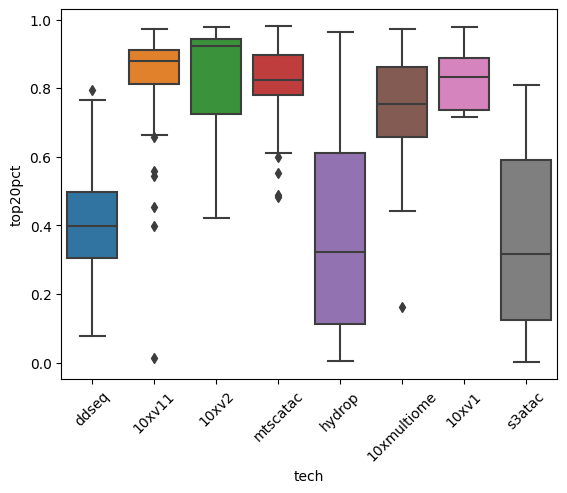

In [518]:
fig, ax = plt.subplots()
sns.boxplot(data=df_merged, y="top20pct", x="tech", ax=ax)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'ddseq'),
  Text(1, 0, '10xv11'),
  Text(2, 0, '10xv2'),
  Text(3, 0, 'mtscatac'),
  Text(4, 0, 'hydrop'),
  Text(5, 0, '10xmultiome'),
  Text(6, 0, '10xv1'),
  Text(7, 0, 's3atac')])

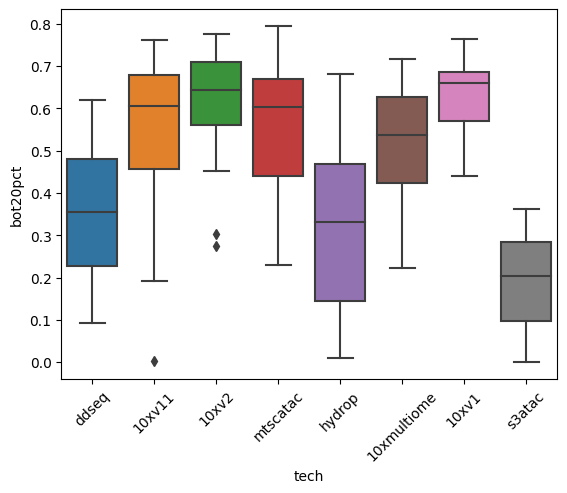

In [519]:
fig, ax = plt.subplots()
sns.boxplot(data=df_merged, y="bot20pct", x="tech")
plt.xticks(rotation=45)

In [520]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}


tech_alias_order = [
    "10x v1",
    "10x v1.1",
    "10x v2",
    "10x Multiome",
    "mtscATAC-seq",
    "ddSEQ SureCell",
    "s3-ATAC",
    "HyDrop",
]

tech_alias_color_palette = {
    tech_alias_dict[x]: tech_color_palette[x] for x in tech_color_palette.keys()
}

In [521]:
df_sub1 = pd.DataFrame()
df_sub1["Percentage Recovered"] = df_merged["top20pct"]
df_sub1["sample"] = df_merged["sample"]
df_sub1["cell_type"] = df_merged["cell_type"]
df_sub1["Percentile"] = "Top 20% DARs"

df_sub2 = pd.DataFrame()
df_sub2["Percentage Recovered"] = df_merged["bot20pct"]
df_sub2["sample"] = df_merged["sample"]
df_sub2["cell_type"] = df_merged["cell_type"]
df_sub2["Percentile"] = "Bottom 20% DARs"

df_merged_stack_dars = pd.concat([df_sub1, df_sub2])

In [522]:
df_merged_stack_dars["Technology"] = [
    tech_alias_dict[x.split("_")[1]] for x in df_merged_stack_dars.index
]
df_merged_stack_dars.reset_index(inplace=True, drop=True)

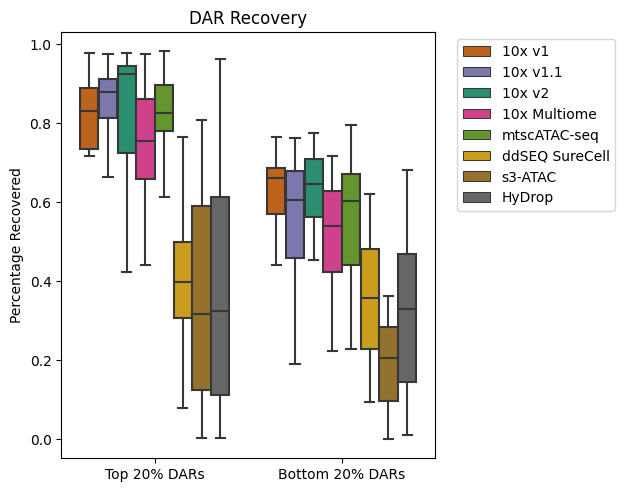

In [523]:
fig, ax = plt.subplots()
sns.boxplot(
    df_merged_stack_dars,
    y="Percentage Recovered",
    x="Percentile",
    hue="Technology",
    showfliers=False,
    hue_order=tech_alias_order,
    palette=tech_alias_color_palette,
    ax=ax,
)
plt.xticks(rotation=0, ha="center")
plt.xlabel(None)
lgd = plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.tight_layout()
plt.title("DAR Recovery")
plt.savefig("plts_final/DARs_recovery_individual.png", dpi=600, facecolor="white")
plt.savefig("plts_final/DARs_recovery_individual.svg", dpi=600, facecolor="white")

In [567]:
from sklearn.preprocessing import minmax_scale

In [568]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "Naive T cells",
    "Cytotoxic_T_cell": "Cytotoxic T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

In [569]:
df_merged_stack_dars

,Percentage Recovered,sample,cell_type,Percentile,Technology
0,0.334588,BIO_ddseq_1,Dendritic_cell,Top 20% DARs,ddSEQ SureCell
1,0.905061,CNA_10xv11_3,Dendritic_cell,Top 20% DARs,10x v1.1
2,0.829569,CNA_10xv11_5,Dendritic_cell,Top 20% DARs,10x v1.1
3,0.861355,CNA_10xv2_1,Dendritic_cell,Top 20% DARs,10x v2
4,0.775408,CNA_10xv2_2,Dendritic_cell,Top 20% DARs,10x v2
...,...,...,...,...,...
535,0.736047,BRO_mtscatac_2,CD4+_T_cell,Bottom 20% DARs,mtscATAC-seq
536,0.601163,CNA_10xmultiome_1,CD4+_T_cell,Bottom 20% DARs,10x Multiome
537,0.525581,CNA_10xmultiome_2,CD4+_T_cell,Bottom 20% DARs,10x Multiome
538,0.722674,CNA_10xv11_1,CD4+_T_cell,Bottom 20% DARs,10x v1.1


In [570]:
df_pivot

cell_type,B_cell,CD14+_monocyte,CD16+_monocyte,CD4+_T_cell,Cytotoxic_T_cell,Dendritic_cell,Natural_killer_cell
sample,,,,,,,
BIO_ddseq_1,0.248372,0.349878,NaN,0.329651,0.282447,0.334588,0.36041
BIO_ddseq_2,0.231163,0.399919,NaN,0.305814,0.239362,0.304057,0.322184
BIO_ddseq_3,0.334419,0.764849,0.432505,0.397093,0.172872,0.554161,0.108532
BIO_ddseq_4,0.377674,0.794752,0.443189,0.424419,0.137766,0.221455,0.077816
BRO_mtscatac_1,0.552093,0.973759,0.961167,0.917442,0.864894,0.769971,0.845051
BRO_mtscatac_2,0.48186,0.970098,0.981303,0.919186,0.87766,0.808239,0.857338
CNA_10xmultiome_1,0.820465,0.878153,NaN,0.805233,0.851596,0.813885,0.869625
CNA_10xmultiome_2,0.637674,0.910903,NaN,0.768605,0.633511,0.846508,0.645734
CNA_10xv11_1,0.907442,0.888731,0.935895,0.913372,0.893617,NaN,0.879863


In [571]:
df_pivot = (
    df_merged_stack_dars[df_merged_stack_dars["Percentile"] == "Top 20% DARs"]
    .pivot(columns="sample", index="cell_type", values="Percentage Recovered")
    .T
)

df_pivot

# df_pivot = df_pivot.loc[tech_alias_order]
df_pivot = df_pivot[cell_type_order]

# df_pivot.index = [tech_alias_dict[x] for x in df_pivot.index]

# df_pivot.columns = [cell_type_alias_dict[x] for x in df_pivot.columns]
df_pivot_tosave_top20_dars = df_pivot.copy()
df_pivot_normalized = df_pivot.astype(float).transform(
    lambda x: minmax_scale(x.astype(float))
)

In [572]:
df_pivot_normalized

cell_type,B_cell,CD4+_T_cell,Cytotoxic_T_cell,Natural_killer_cell,CD14+_monocyte,CD16+_monocyte,Dendritic_cell
sample,,,,,,,
BIO_ddseq_1,0.261728,0.342491,0.293113,0.349962,0.349210,NaN,0.165494
BIO_ddseq_2,0.243457,0.317460,0.247012,0.306984,0.401054,NaN,0.120832
BIO_ddseq_3,0.353086,0.413309,0.175868,0.066769,0.779136,0.289060,0.486693
BIO_ddseq_4,0.399012,0.442002,0.138304,0.032233,0.810116,0.302901,0.000000
BRO_mtscatac_1,0.584198,0.959707,0.916335,0.894858,0.995574,0.973915,0.802386
BRO_mtscatac_2,0.509630,0.961538,0.929994,0.908672,0.991781,1.000000,0.858366
CNA_10xmultiome_1,0.869136,0.841880,0.902106,0.922487,0.896523,NaN,0.866626
CNA_10xmultiome_2,0.675062,0.803419,0.668754,0.670760,0.930453,NaN,0.914347
CNA_10xv11_1,0.961481,0.955433,0.947069,0.933998,0.907482,0.941176,NaN


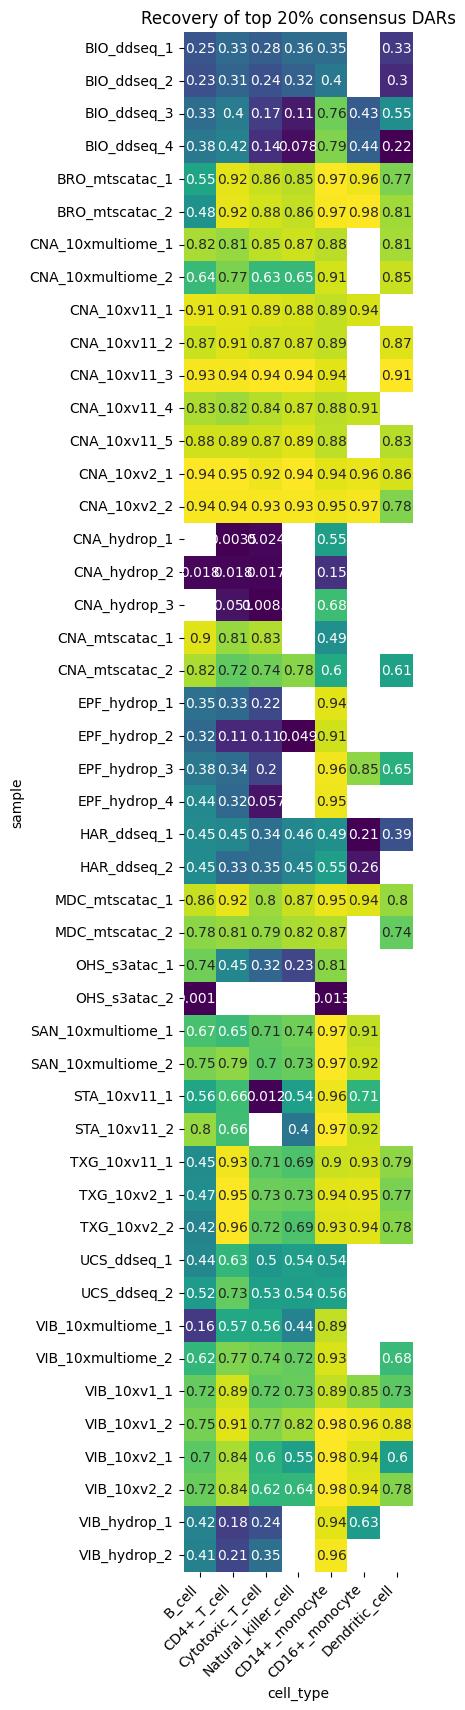

In [573]:
fig, ax = plt.subplots(figsize=(10, 20))
sns.heatmap(
    data=df_pivot_normalized,
    square=True,
    cmap="viridis",
    ax=ax,
    annot=df_pivot,
    cbar=False,
)
# sns.heatmap(
#     data=df_merged_pivot_abs, ax=ax, cmap="viridis", annot=True, square=True, alpha=0
# )

plt.xticks(rotation=45, ha="right")
plt.title("Recovery of top 20% consensus DARs")
plt.savefig(
    "plts_final/overlap_with_top20pct_consensus_dars_individual.png",
    dpi=600,
    facecolor="white",
    # bbox_inches="tight",
)
plt.savefig(
    "plts_final/overlap_with_top20pct_consensus_dars_individual.svg",
    dpi=600,
    facecolor="white",
    # bbox_inches="tight",
)

In [574]:
df_merged_stack_dars

,Percentage Recovered,sample,cell_type,Percentile,Technology
0,0.334588,BIO_ddseq_1,Dendritic_cell,Top 20% DARs,ddSEQ SureCell
1,0.905061,CNA_10xv11_3,Dendritic_cell,Top 20% DARs,10x v1.1
2,0.829569,CNA_10xv11_5,Dendritic_cell,Top 20% DARs,10x v1.1
3,0.861355,CNA_10xv2_1,Dendritic_cell,Top 20% DARs,10x v2
4,0.775408,CNA_10xv2_2,Dendritic_cell,Top 20% DARs,10x v2
...,...,...,...,...,...
535,0.736047,BRO_mtscatac_2,CD4+_T_cell,Bottom 20% DARs,mtscATAC-seq
536,0.601163,CNA_10xmultiome_1,CD4+_T_cell,Bottom 20% DARs,10x Multiome
537,0.525581,CNA_10xmultiome_2,CD4+_T_cell,Bottom 20% DARs,10x Multiome
538,0.722674,CNA_10xv11_1,CD4+_T_cell,Bottom 20% DARs,10x v1.1


In [575]:
df_pivot = (
    df_merged_stack_dars[df_merged_stack_dars["Percentile"] == "Bottom 20% DARs"]
    .pivot(columns="sample", index="cell_type", values="Percentage Recovered")
    .T
)

df_pivot

# df_pivot = df_pivot.loc[tech_alias_order]
# df_pivot = df_pivot[cell_type_order]

# df_pivot.index = [tech_alias_dict[x] for x in df_pivot.index]

# df_pivot.columns = [cell_type_alias_dict[x] for x in df_pivot.columns]
df_pivot_tosave_bot20_dars = df_pivot.copy()
df_pivot_normalized = df_pivot.astype(float).transform(
    lambda x: minmax_scale(x.astype(float))
)

In [533]:
df_pivot

cell_type,B_cell,CD14+_monocyte,CD16+_monocyte,CD4+_T_cell,Cytotoxic_T_cell,Dendritic_cell,Natural_killer_cell
sample,,,,,,,
BIO_ddseq_1,0.282326,0.451383,NaN,0.219186,0.146809,0.356336,0.224573
BIO_ddseq_2,0.294884,0.437958,NaN,0.203488,0.136702,0.365747,0.308532
BIO_ddseq_3,0.219535,0.559805,0.619889,0.465116,0.360106,0.589921,0.143345
BIO_ddseq_4,0.227907,0.573434,0.613109,0.464535,0.330319,0.118151,0.127645
BRO_mtscatac_1,0.486512,0.730269,0.608588,0.794767,0.725532,0.452321,0.688737
BRO_mtscatac_2,0.460465,0.73271,0.657489,0.736047,0.68617,0.624007,0.643686
CNA_10xmultiome_1,0.423256,0.688161,NaN,0.601163,0.494149,0.692388,0.517406
CNA_10xmultiome_2,0.228372,0.62144,NaN,0.525581,0.223936,0.691133,0.337884
CNA_10xv11_1,0.442791,0.659886,0.626464,0.722674,0.709574,NaN,0.604778


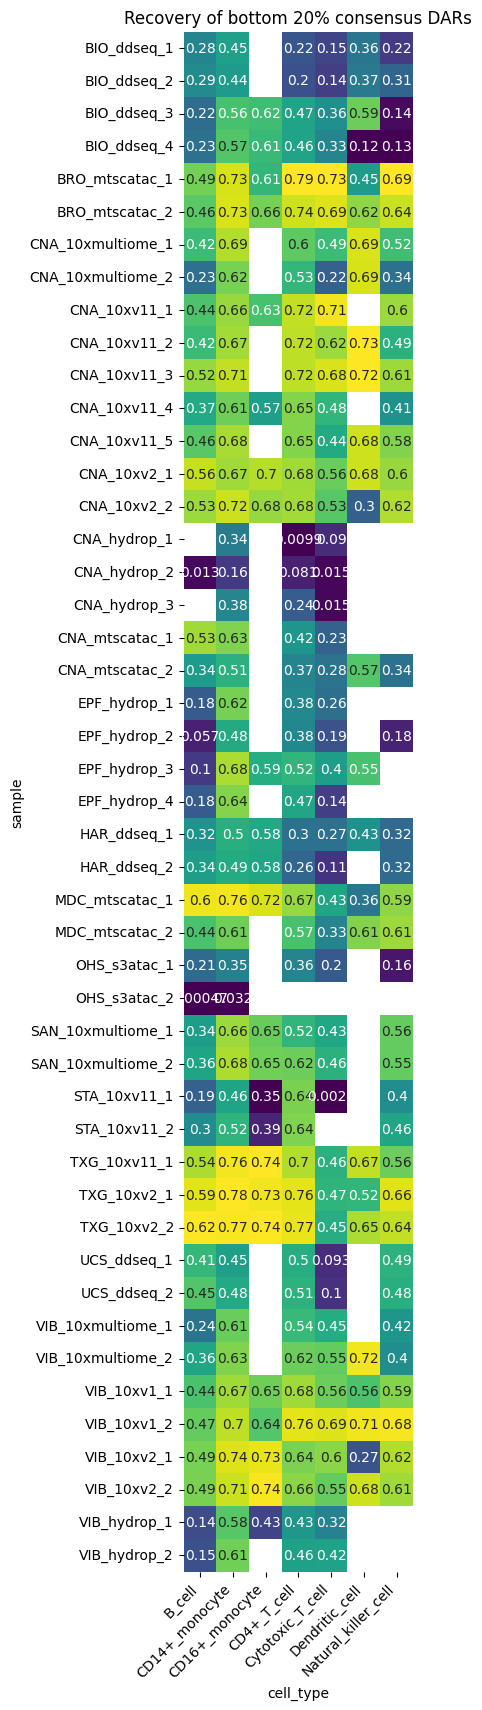

In [534]:
fig, ax = plt.subplots(figsize=(10, 20))
sns.heatmap(
    data=df_pivot_normalized,
    square=True,
    cmap="viridis",
    ax=ax,
    annot=df_pivot,
    cbar=False,
)
# sns.heatmap(
#     data=df_merged_pivot_abs, ax=ax, cmap="viridis", annot=True, square=True, alpha=0
# )

plt.xticks(rotation=45, ha="right")
plt.title("Recovery of bottom 20% consensus DARs")
plt.savefig(
    "plts_final/overlap_with_bot20pct_consensus_dars_individual.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/overlap_with_bot20pct_consensus_dars_individual.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

# same analysis for peaks

In [535]:
samples_number_dict = {x: samples.index(x) for x in samples}
samples_number_dict

samples_number_dict_rev = {y: x for x, y in samples_number_dict.items()}

cell_types_numbers_dict = {
    "Dendritic_cell": "a",
    "Cytotoxic_T_cell": "b",
    "Natural_killer_cell": "c",
    "peaks_dict.pkl": "d",
    "CD14+_monocyte": "e",
    "CD16+_monocyte": "f",
    "B_cell": "g",
    "CD4+_T_cell": "h",
}

cell_types_numbers_dict_rev = {y: x for x, y in cell_types_numbers_dict.items()}

peak_paths = {
    x.split("/")[-2].split("__")[0] + "__" + x.split("/")[-1]: x
    for x in sorted(
        glob.glob("../fixedcells_3_cistopic_consensus/final_consensus_peaks/*/*.bed")
    )
}
peak_paths

{'BIO_ddseq_1.FIXEDCELLS__Bcell_summits.bed': '../fixedcells_3_cistopic_consensus/final_consensus_peaks/BIO_ddseq_1.FIXEDCELLS__SCREEN_consensus_peaks/Bcell_summits.bed',
 'BIO_ddseq_1.FIXEDCELLS__Bcell_summits__unique.bed': '../fixedcells_3_cistopic_consensus/final_consensus_peaks/BIO_ddseq_1.FIXEDCELLS__SCREEN_consensus_peaks/Bcell_summits__unique.bed',
 'BIO_ddseq_1.FIXEDCELLS__CD14_monocyte_summits.bed': '../fixedcells_3_cistopic_consensus/final_consensus_peaks/BIO_ddseq_1.FIXEDCELLS__SCREEN_consensus_peaks/CD14_monocyte_summits.bed',
 'BIO_ddseq_1.FIXEDCELLS__CD4_Tcell_summits.bed': '../fixedcells_3_cistopic_consensus/final_consensus_peaks/BIO_ddseq_1.FIXEDCELLS__SCREEN_consensus_peaks/CD4_Tcell_summits.bed',
 'BIO_ddseq_1.FIXEDCELLS__CytotoxicTcell_summits.bed': '../fixedcells_3_cistopic_consensus/final_consensus_peaks/BIO_ddseq_1.FIXEDCELLS__SCREEN_consensus_peaks/CytotoxicTcell_summits.bed',
 'BIO_ddseq_1.FIXEDCELLS__Dendriticcell_summits.bed': '../fixedcells_3_cistopic_consens

In [536]:
n_peak_dict = {}
for sample, peak_path in peak_paths.items():
    print(sample)
    df = pd.read_csv(peak_path, sep="\t", header=None)

    n_peak_dict[sample] = len(df)

n_peak_dict

BIO_ddseq_1.FIXEDCELLS__Bcell_summits.bed
BIO_ddseq_1.FIXEDCELLS__Bcell_summits__unique.bed
BIO_ddseq_1.FIXEDCELLS__CD14_monocyte_summits.bed
BIO_ddseq_1.FIXEDCELLS__CD4_Tcell_summits.bed
BIO_ddseq_1.FIXEDCELLS__CytotoxicTcell_summits.bed
BIO_ddseq_1.FIXEDCELLS__Dendriticcell_summits.bed
BIO_ddseq_1.FIXEDCELLS__Naturalkillercell_summits.bed
BIO_ddseq_2.FIXEDCELLS__Bcell_summits.bed
BIO_ddseq_2.FIXEDCELLS__Bcell_summits__unique.bed
BIO_ddseq_2.FIXEDCELLS__CD14_monocyte_summits.bed
BIO_ddseq_2.FIXEDCELLS__CD4_Tcell_summits.bed
BIO_ddseq_2.FIXEDCELLS__CytotoxicTcell_summits.bed
BIO_ddseq_2.FIXEDCELLS__Dendriticcell_summits.bed
BIO_ddseq_2.FIXEDCELLS__Naturalkillercell_summits.bed
BIO_ddseq_3.FIXEDCELLS__Bcell_summits.bed
BIO_ddseq_3.FIXEDCELLS__Bcell_summits__unique.bed
BIO_ddseq_3.FIXEDCELLS__CD14_monocyte_summits.bed
BIO_ddseq_3.FIXEDCELLS__CD16_monocyte_summits.bed
BIO_ddseq_3.FIXEDCELLS__CD4_Tcell_summits.bed
BIO_ddseq_3.FIXEDCELLS__CytotoxicTcell_summits.bed
BIO_ddseq_3.FIXEDCELLS__D

{'BIO_ddseq_1.FIXEDCELLS__Bcell_summits.bed': 57701,
 'BIO_ddseq_1.FIXEDCELLS__Bcell_summits__unique.bed': 57702,
 'BIO_ddseq_1.FIXEDCELLS__CD14_monocyte_summits.bed': 87908,
 'BIO_ddseq_1.FIXEDCELLS__CD4_Tcell_summits.bed': 74153,
 'BIO_ddseq_1.FIXEDCELLS__CytotoxicTcell_summits.bed': 63790,
 'BIO_ddseq_1.FIXEDCELLS__Dendriticcell_summits.bed': 41965,
 'BIO_ddseq_1.FIXEDCELLS__Naturalkillercell_summits.bed': 48188,
 'BIO_ddseq_2.FIXEDCELLS__Bcell_summits.bed': 62368,
 'BIO_ddseq_2.FIXEDCELLS__Bcell_summits__unique.bed': 62369,
 'BIO_ddseq_2.FIXEDCELLS__CD14_monocyte_summits.bed': 79716,
 'BIO_ddseq_2.FIXEDCELLS__CD4_Tcell_summits.bed': 84139,
 'BIO_ddseq_2.FIXEDCELLS__CytotoxicTcell_summits.bed': 57590,
 'BIO_ddseq_2.FIXEDCELLS__Dendriticcell_summits.bed': 34108,
 'BIO_ddseq_2.FIXEDCELLS__Naturalkillercell_summits.bed': 50243,
 'BIO_ddseq_3.FIXEDCELLS__Bcell_summits.bed': 59383,
 'BIO_ddseq_3.FIXEDCELLS__Bcell_summits__unique.bed': 59384,
 'BIO_ddseq_3.FIXEDCELLS__CD14_monocyte_summit

In [537]:
peak_paths = {
    "__".join(x.split("/")[-1].split("__")[:-1]): x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/*/*top20pct.bed"
        )
    )
}

n_peak_dict_top_merged = {}
for sample, peak_path in peak_paths.items():
    print(sample)
    df = pd.read_csv(peak_path, sep="\t", header=None)

    n_peak_dict_top_merged[sample.split("_summits")[0]] = len(df)

n_peak_dict_top_merged

Bcell_summits
CD14_monocyte_summits
CD16_monocyte_summits
CD4_Tcell_summits
CytotoxicTcell_summits
Dendriticcell_summits
Naturalkillercell_summits


{'Bcell': 31382,
 'CD14_monocyte': 42895,
 'CD16_monocyte': 23227,
 'CD4_Tcell': 33842,
 'CytotoxicTcell': 43866,
 'Dendriticcell': 24590,
 'Naturalkillercell': 20857}

In [538]:
peak_paths = {
    "__".join(x.split("/")[-1].split("__")[:-1]): x
    for x in sorted(
        glob.glob(
            "../fixedcells_7_merged_equalcells_celltypefair/final_consensus_peaks/*/*bot20pct.bed"
        )
    )
}

n_peak_dict_bot_merged = {}
for sample, peak_path in peak_paths.items():
    print(sample)
    df = pd.read_csv(peak_path, sep="\t", header=None)

    n_peak_dict_bot_merged[sample.split("_summits")[0]] = len(df)

n_peak_dict_bot_merged

Bcell_summits
CD14_monocyte_summits
CD16_monocyte_summits
CD4_Tcell_summits
CytotoxicTcell_summits
Dendriticcell_summits
Naturalkillercell_summits


{'Bcell': 30124,
 'CD14_monocyte': 37629,
 'CD16_monocyte': 17746,
 'CD4_Tcell': 26445,
 'CytotoxicTcell': 32136,
 'Dendriticcell': 18228,
 'Naturalkillercell': 18796}

In [539]:
cell_types_numbers_dict = {
    "CD16_monocyte": "i",
    "CD4_Tcell": "j",
    "CD14_monocyte": "k",
    "Naturalkillercell": "l",
    "Dendriticcell": "m",
    "CytotoxicTcell": "n",
    "Bcell": "o",
}

cell_types_numbers_dict_rev = {y: x for x, y in cell_types_numbers_dict.items()}
cell_types_numbers_dict

{'CD16_monocyte': 'i',
 'CD4_Tcell': 'j',
 'CD14_monocyte': 'k',
 'Naturalkillercell': 'l',
 'Dendriticcell': 'm',
 'CytotoxicTcell': 'n',
 'Bcell': 'o'}

In [540]:
sorted(glob.glob("upset_mergepeaks_individual_samples/*top20*peaks*count.matrix*"))

['upset_mergepeaks_individual_samples/i_11__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks_individual_samples/i_13__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks_individual_samples/i_14__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks_individual_samples/i_22__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks_individual_samples/i_24__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks_individual_samples/i_25__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks_individual_samples/i_26__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks_individual_samples/i_2__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks_individual_samples/i_30__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks_individual_samples/i_31__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks_individual_samples/i_32__top20pct_peaks_matrix.txt.count.matrix.txt',
 'upset_mergepeaks_ind

In [541]:
df_merged = pd.DataFrame(columns=["top20pct", "bot20pct", "cell_type"])
for matrix_path in sorted(
    glob.glob("upset_mergepeaks_individual_samples/*top20*peaks*count.matrix*")
):
    print(matrix_path)
    sample_number = matrix_path.split("/")[-1].split("__")[0].split("_")[1]
    sample = samples_number_dict_rev[int(sample_number)]
    cell_type_letter = matrix_path.split("/")[-1].split("__")[0].split("_")[0]
    cell_type = cell_types_numbers_dict_rev[cell_type_letter]

    n_peaks_top = n_peak_dict_top_merged[cell_type]

    df = pd.read_csv(matrix_path, sep="\t", index_col=0)
    df.columns = [f"merged__{cell_type}", f"{sample}__{cell_type}"]
    df.index = [f"merged__{cell_type}", f"{sample}__{cell_type}"]

    ratio_found = (
        df.at[f"{sample}__{cell_type}", f"merged__{cell_type}"]
        / df.at[f"{sample}__{cell_type}", f"{sample}__{cell_type}"]
    )

    df_merged.at[f"{sample}__{cell_type}", "top20pct"] = ratio_found

upset_mergepeaks_individual_samples/i_11__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_13__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_14__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_22__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_24__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_25__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_26__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_2__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_30__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_31__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_32__top20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_33__top20pct_peaks_matrix.tx

In [542]:
for matrix_path in sorted(
    glob.glob("upset_mergepeaks_individual_samples/*bot20*peaks*count.matrix*")
):
    print(matrix_path)
    sample_number = matrix_path.split("/")[-1].split("__")[0].split("_")[1]
    sample = samples_number_dict_rev[int(sample_number)]
    cell_type_letter = matrix_path.split("/")[-1].split("__")[0].split("_")[0]
    cell_type = cell_types_numbers_dict_rev[cell_type_letter]

    n_peaks_top = n_peak_dict_bot_merged[cell_type]

    df = pd.read_csv(matrix_path, sep="\t", index_col=0)
    df.columns = [f"merged__{cell_type}", f"{sample}__{cell_type}"]
    df.index = [f"merged__{cell_type}", f"{sample}__{cell_type}"]

    ratio_found = (
        df.at[f"{sample}__{cell_type}", f"merged__{cell_type}"]
        / df.at[f"{sample}__{cell_type}", f"{sample}__{cell_type}"]
    )

    df_merged.at[f"{sample}__{cell_type}", "bot20pct"] = ratio_found

upset_mergepeaks_individual_samples/i_11__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_13__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_14__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_22__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_24__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_25__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_26__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_2__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_30__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_31__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_32__bot20pct_peaks_matrix.txt.count.matrix.txt
upset_mergepeaks_individual_samples/i_33__bot20pct_peaks_matrix.tx

In [543]:
df_merged["cell_type"] = [x.split("__")[1] for x in df_merged.index]
df_merged["sample"] = [x.split("__")[0] for x in df_merged.index]
df_merged["tech"] = [x.split("_")[0] for x in df_merged["sample"]]

df_merged

,top20pct,bot20pct,cell_type,sample,tech
CNA_10xv11_4__CD16_monocyte,0.612003,0.011777,CD16_monocyte,CNA_10xv11_4,CNA
CNA_10xv2_1__CD16_monocyte,0.975029,0.132819,CD16_monocyte,CNA_10xv2_1,CNA
CNA_10xv2_2__CD16_monocyte,0.994489,0.155246,CD16_monocyte,CNA_10xv2_2,CNA
EPF_hydrop_3__CD16_monocyte,0.670556,0.025076,CD16_monocyte,EPF_hydrop_3,EPF
HAR_ddseq_1__CD16_monocyte,0.869807,0.097769,CD16_monocyte,HAR_ddseq_1,HAR
...,...,...,...,...,...
BRO_mtscatac_2__Bcell,0.95797,0.020548,Bcell,BRO_mtscatac_2,BRO
CNA_10xmultiome_1__Bcell,0.992703,0.060284,Bcell,CNA_10xmultiome_1,CNA
CNA_10xmultiome_2__Bcell,0.946912,0.030474,Bcell,CNA_10xmultiome_2,CNA
CNA_10xv11_1__Bcell,0.956121,0.017494,Bcell,CNA_10xv11_1,CNA


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'CNA'),
  Text(1, 0, 'EPF'),
  Text(2, 0, 'HAR'),
  Text(3, 0, 'MDC'),
  Text(4, 0, 'BIO'),
  Text(5, 0, 'SAN'),
  Text(6, 0, 'STA'),
  Text(7, 0, 'TXG'),
  Text(8, 0, 'VIB'),
  Text(9, 0, 'BRO'),
  Text(10, 0, 'OHS'),
  Text(11, 0, 'UCS')])

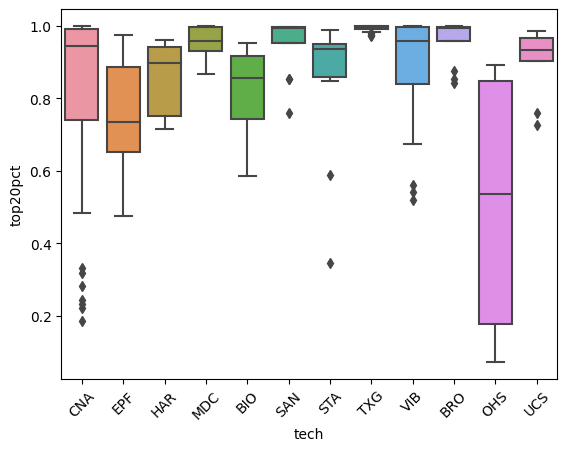

In [544]:
fig, ax = plt.subplots()
sns.boxplot(data=df_merged, y="top20pct", x="tech", ax=ax)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'CNA'),
  Text(1, 0, 'EPF'),
  Text(2, 0, 'HAR'),
  Text(3, 0, 'MDC'),
  Text(4, 0, 'BIO'),
  Text(5, 0, 'SAN'),
  Text(6, 0, 'STA'),
  Text(7, 0, 'TXG'),
  Text(8, 0, 'VIB'),
  Text(9, 0, 'BRO'),
  Text(10, 0, 'OHS'),
  Text(11, 0, 'UCS')])

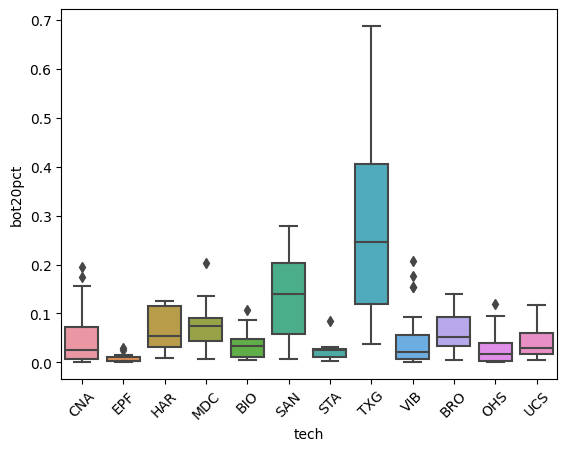

In [545]:
fig, ax = plt.subplots()
sns.boxplot(data=df_merged, y="bot20pct", x="tech")
plt.xticks(rotation=45)

In [546]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}


tech_alias_order = [
    "10x v1",
    "10x v1.1",
    "10x v2",
    "10x Multiome",
    "mtscATAC-seq",
    "ddSEQ SureCell",
    "s3-ATAC",
    "HyDrop",
]

tech_alias_color_palette = {
    tech_alias_dict[x]: tech_color_palette[x] for x in tech_color_palette.keys()
}

In [547]:
df_merged_stack_peaks

,Percentage Recovered,sample,cell_type,Percentile,Technology
0,0.612003,CNA_10xv11_4,CD16_monocyte,Top 20% peaks,10x v1.1
1,0.975029,CNA_10xv2_1,CD16_monocyte,Top 20% peaks,10x v2
2,0.994489,CNA_10xv2_2,CD16_monocyte,Top 20% peaks,10x v2
3,0.670556,EPF_hydrop_3,CD16_monocyte,Top 20% peaks,HyDrop
4,0.869807,HAR_ddseq_1,CD16_monocyte,Top 20% peaks,ddSEQ SureCell
...,...,...,...,...,...
541,0.020548,BRO_mtscatac_2,Bcell,Bottom 20% peaks,mtscATAC-seq
542,0.060284,CNA_10xmultiome_1,Bcell,Bottom 20% peaks,10x Multiome
543,0.030474,CNA_10xmultiome_2,Bcell,Bottom 20% peaks,10x Multiome
544,0.017494,CNA_10xv11_1,Bcell,Bottom 20% peaks,10x v1.1


In [548]:
df_sub1 = pd.DataFrame()
df_sub1["Percentage Recovered"] = df_merged["top20pct"]
df_sub1["sample"] = df_merged["sample"]
df_sub1["cell_type"] = df_merged["cell_type"]
df_sub1["Percentile"] = "Top 20% peaks"

df_sub2 = pd.DataFrame()
df_sub2["Percentage Recovered"] = df_merged["bot20pct"]
df_sub2["sample"] = df_merged["sample"]
df_sub2["cell_type"] = df_merged["cell_type"]
df_sub2["Percentile"] = "Bottom 20% peaks"

df_merged_stack_peaks = pd.concat([df_sub1, df_sub2])

df_merged_stack_peaks["Technology"] = [
    tech_alias_dict[x.split("_")[1]] for x in df_merged_stack_peaks.index
]
df_merged_stack_peaks.reset_index(inplace=True, drop=True)

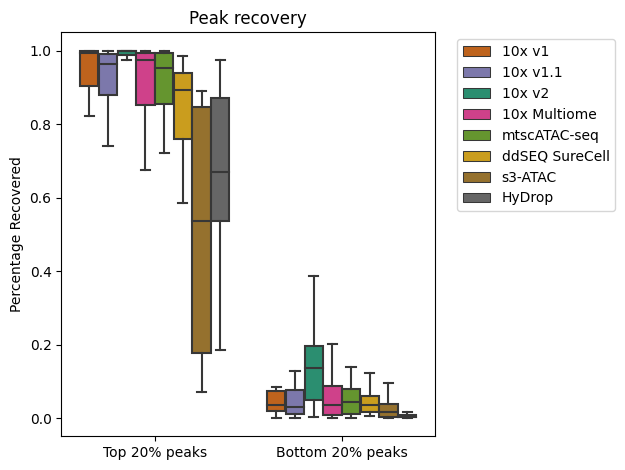

In [549]:
fig, ax = plt.subplots()
sns.boxplot(
    df_merged_stack_peaks,
    y="Percentage Recovered",
    x="Percentile",
    hue="Technology",
    showfliers=False,
    hue_order=tech_alias_order,
    palette=tech_alias_color_palette,
    ax=ax,
)
plt.xticks(rotation=0, ha="center")
plt.xlabel(None)
lgd = plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.title("Peak recovery")

plt.tight_layout()
plt.savefig("plts_final/peaks_recovery_individual.png", dpi=600, facecolor="white")
plt.savefig("plts_final/peaks_recovery_individual.svg", dpi=600, facecolor="white")

In [550]:
from sklearn.preprocessing import minmax_scale

In [551]:
cell_type_alias_dict = {
    "Bcell": "B cells",
    "CD14_monocyte": "CD14+ monocytes",
    "CD4_Tcell": "Naive T cells",
    "CytotoxicTcell": "Cytotoxic T cells",
    "Dendriticcell": "Dendritic cells",
    "Naturalkillercell": "NK cells",
    "CD16_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "Bcell",
    "CD4_Tcell",
    "CytotoxicTcell",
    "Naturalkillercell",
    "CD14_monocyte",
    "CD16_monocyte",
    "Dendriticcell",
]

In [552]:
df_merged_stack_peaks

,Percentage Recovered,sample,cell_type,Percentile,Technology
0,0.612003,CNA_10xv11_4,CD16_monocyte,Top 20% peaks,10x v1.1
1,0.975029,CNA_10xv2_1,CD16_monocyte,Top 20% peaks,10x v2
2,0.994489,CNA_10xv2_2,CD16_monocyte,Top 20% peaks,10x v2
3,0.670556,EPF_hydrop_3,CD16_monocyte,Top 20% peaks,HyDrop
4,0.869807,HAR_ddseq_1,CD16_monocyte,Top 20% peaks,ddSEQ SureCell
...,...,...,...,...,...
541,0.020548,BRO_mtscatac_2,Bcell,Bottom 20% peaks,mtscATAC-seq
542,0.060284,CNA_10xmultiome_1,Bcell,Bottom 20% peaks,10x Multiome
543,0.030474,CNA_10xmultiome_2,Bcell,Bottom 20% peaks,10x Multiome
544,0.017494,CNA_10xv11_1,Bcell,Bottom 20% peaks,10x v1.1


In [553]:
df_pivot = (
    df_merged_stack_peaks[df_merged_stack_peaks["Percentile"] == "Top 20% peaks"]
    .pivot(columns="sample", index="cell_type", values="Percentage Recovered")
    .T
)


# df_pivot = df_pivot.loc[tech_alias_order]
df_pivot = df_pivot[cell_type_order]

# df_pivot.index = [tech_alias_dict[x] for x in df_pivot.index]

df_pivot.columns = [cell_type_alias_dict[x] for x in df_pivot.columns]

df_pivot_normalized = df_pivot.astype(float).transform(
    lambda x: minmax_scale(x.astype(float))
)

df_pivot_tosave_top20_peaks = df_pivot.copy()

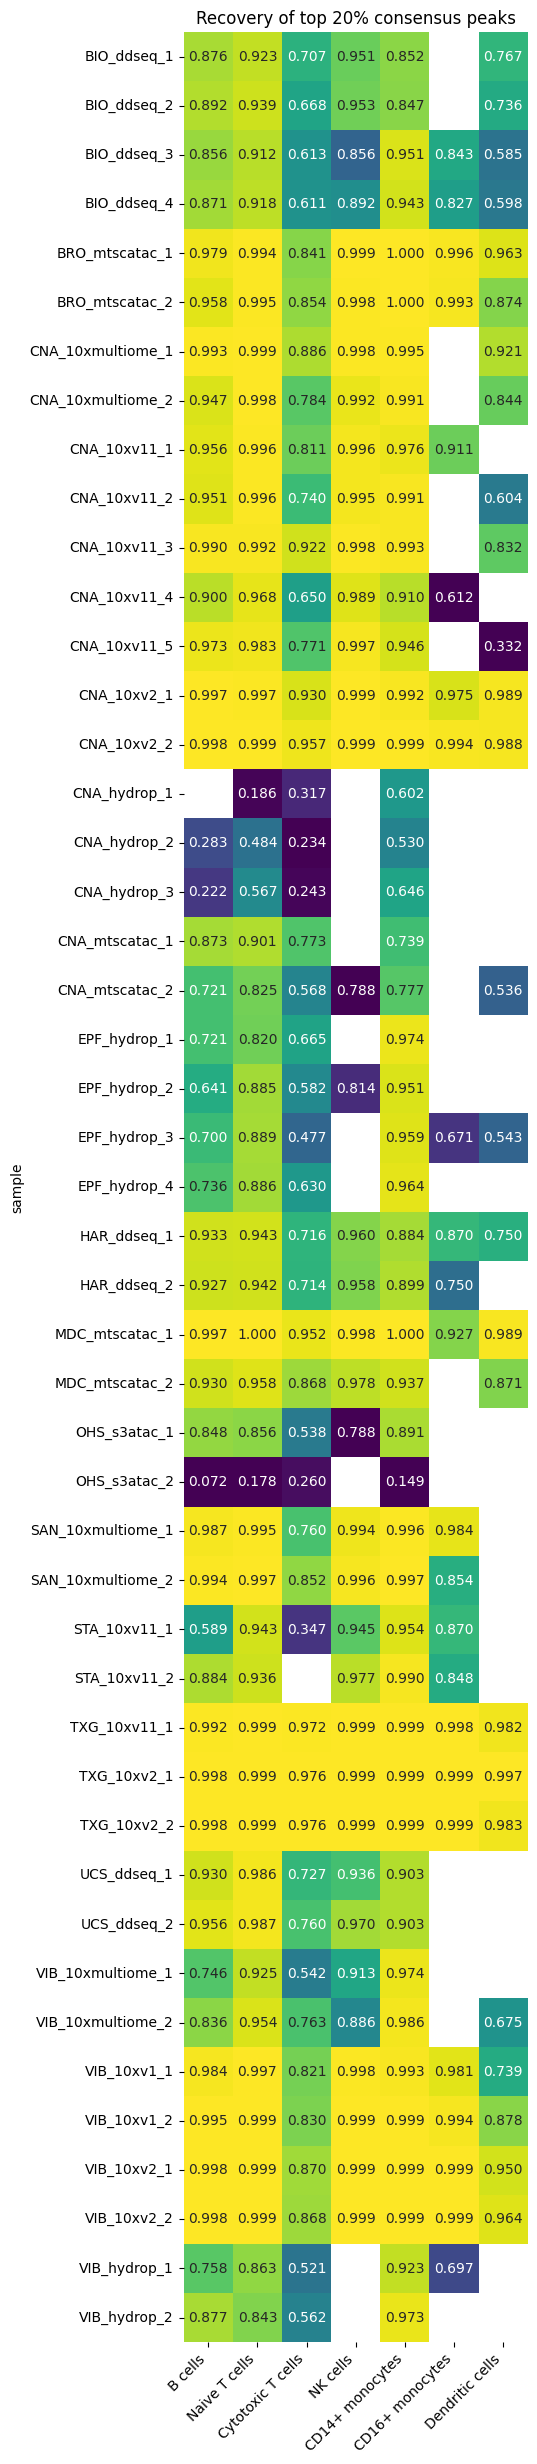

In [554]:
fig, ax = plt.subplots(figsize=(15, 30))
sns.heatmap(
    data=df_pivot_normalized,
    square=True,
    cmap="viridis",
    ax=ax,
    fmt=".3f",
    annot=df_pivot,
    cbar=False,
)
# sns.heatmap(
#     data=df_merged_pivot_abs, ax=ax, cmap="viridis", annot=True, square=True, alpha=0
# )

plt.xticks(rotation=45, ha="right")
plt.title("Recovery of top 20% consensus peaks")
plt.savefig(
    "plts_final/overlap_with_top20pct_consensus_peaks_individual.png",
    dpi=600,
    facecolor="white",
    # bbox_inches="tight",
)
plt.savefig(
    "plts_final/overlap_with_top20pct_consensus_peaks_individual.svg",
    dpi=600,
    facecolor="white",
    # bbox_inches="tight",
)

In [555]:
df_pivot = (
    df_merged_stack_peaks[df_merged_stack_peaks["Percentile"] == "Bottom 20% peaks"]
    .pivot(columns="sample", index="cell_type", values="Percentage Recovered")
    .T
)

df_pivot

# df_pivot = df_pivot.loc[tech_alias_order]
df_pivot = df_pivot[cell_type_order]

# df_pivot.index = [tech_alias_dict[x] for x in df_pivot.index]

df_pivot.columns = [cell_type_alias_dict[x] for x in df_pivot.columns]


df_pivot_normalized = df_pivot.astype(float).transform(
    lambda x: minmax_scale(x.astype(float))
)

df_pivot_tosave_bot20_peaks = df_pivot.copy()

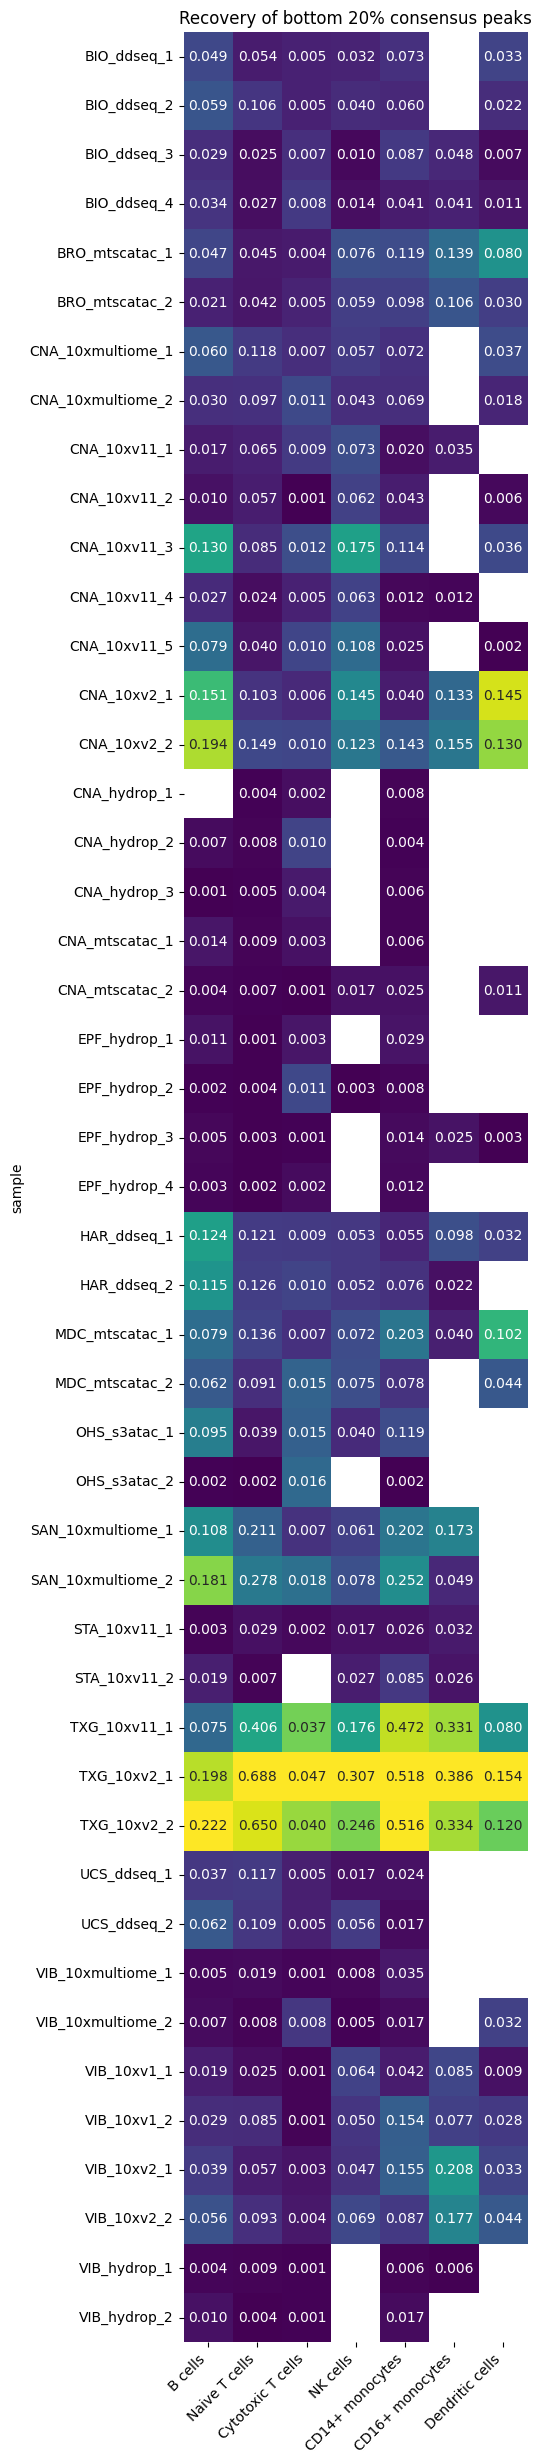

<Figure size 640x480 with 0 Axes>

In [556]:
fig, ax = plt.subplots(figsize=(15, 30))
sns.heatmap(
    data=df_pivot_normalized,
    square=True,
    cmap="viridis",
    ax=ax,
    annot=df_pivot,
    fmt=".3f",
    cbar=False,
)
# sns.heatmap(
#     data=df_merged_pivot_abs, ax=ax, cmap="viridis", annot=True, square=True, alpha=0
# )

plt.xticks(rotation=45, ha="right")
plt.title("Recovery of bottom 20% consensus peaks")
plt.show()
plt.savefig(
    "plts_final/overlap_with_bot20pct_consensus_peaks_individual.png",
    dpi=600,
    facecolor="white",
    # bbox_inches="tight",
)
plt.savefig(
    "plts_final/overlap_with_bot20pct_consensus_peaks_individual.svg",
    dpi=600,
    facecolor="white",
    # bbox_inches="tight",
)

# save this to tsv

In [562]:
df_pivot_tosave_bot20_peaks.columns = [
    x.replace(" ", "_") + "_bot20peaks_recovery"
    for x in df_pivot_tosave_bot20_peaks.columns
]

In [563]:
df_pivot_tosave_top20_peaks.columns = [
    x.replace(" ", "_") + "_top20peaks_recovery"
    for x in df_pivot_tosave_top20_peaks.columns
]

In [564]:
df_pivot_tosave_bot20_dars.columns = [
    x.replace(" ", "_") + "_bot20dars_recovery"
    for x in df_pivot_tosave_bot20_dars.columns
]

In [576]:
df_pivot_tosave_top20_dars.columns = [
    x.replace(" ", "_") + "_top20dars_recovery"
    for x in df_pivot_tosave_top20_dars.columns
]

In [590]:
df_pivot_tosave_bot20_peaks[
    "mean_bot20peaks_recovery"
] = df_pivot_tosave_bot20_peaks.mean(axis=1)
df_pivot_tosave_top20_peaks[
    "mean_top20peaks_recovery"
] = df_pivot_tosave_top20_peaks.mean(axis=1)
df_pivot_tosave_bot20_dars["mean_bot20dars_recovery"] = df_pivot_tosave_bot20_dars.mean(
    axis=1
)
df_pivot_tosave_top20_dars["mean_top20dars_recovery"] = df_pivot_tosave_top20_dars.mean(
    axis=1
)

In [591]:
pd.concat(
    [
        df_pivot_tosave_bot20_peaks,
        df_pivot_tosave_top20_peaks,
        df_pivot_tosave_bot20_dars,
        df_pivot_tosave_top20_dars,
    ],
    axis=1,
).to_csv("peak_dar_recovery_individual_samples.tsv", sep="\t", index=True, header=True)